In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("data.csv")

In [3]:
train_data["color"] = train_data["target"].map(lambda x: "red" if x=="B" else "green")

# Wが0、Bが1
train_data["target_bin"] = train_data["target"].map(lambda x: 0 if x=="W" else 1)
train_data

,w_num,b_num,target,color,target_bin
0,30,30,B,red,1
1,14,30,B,red,1
2,4,5,W,green,0
3,43,15,B,red,1
4,32,26,B,red,1
...,...,...,...,...,...
95,5,12,W,green,0
96,2,2,B,red,1
97,4,4,B,red,1
98,43,13,B,red,1


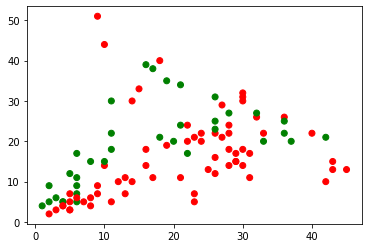

In [4]:
# Visualize
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(train_data["w_num"], train_data["b_num"], c=train_data["color"])
plt.show()

In [5]:
def plot_deviced_area(model, data, data_class):
    df = pd.merge(
        pd.DataFrame(data), pd.DataFrame(data_class), left_index=True, right_index=True
    )
    class_1_x = df.loc[df["target"] == 0, "w_num"]
    class_1_y = df.loc[df["target"] == 0, "b_num"]
    class_2_x = df.loc[df["target"] == 1, "w_num"]
    class_2_y = df.loc[df["target"] == 1, "b_num"]
    # print(data)
    # print(data_class)
    # print(df)

    # 決定境界可視化用
    grid_line = np.arange(0, 50, 0.05)
    X, Y = np.meshgrid(grid_line, grid_line)
    Z = model.predict(np.array([X.ravel(), Y.ravel()]).T)
    Z = Z.reshape(X.shape)

    # ここからグラフ描画
    # フォントの種類とサイズを設定する。
    plt.rcParams["font.size"] = 14

    # 目盛を内側にする。
    plt.rcParams["xtick.direction"] = "in"
    plt.rcParams["ytick.direction"] = "in"

    ax1 = plt.subplot(111)

    # グラフの上下左右に目盛線を付ける。
    ax1.yaxis.set_ticks_position("both")
    ax1.xaxis.set_ticks_position("both")

    # 軸のラベルを設定する。
    # ax1.set_xlabel("x")
    # ax1.set_ylabel("y")

    # データプロットする。
    ax1.contourf(X, Y, Z, cmap="coolwarm")
    ax1.scatter(class_1_x, class_1_y, label="class=1", edgecolors="black")
    ax1.scatter(class_2_x, class_2_y, label="class=2", edgecolors="black")

    plt.legend()

    # グラフを表示する。
    plt.show()
    plt.close()

In [6]:
from sklearn.svm import SVC, LinearSVC

In [17]:
pred_data = pd.read_csv("data.csv")
del pred_data["target"]

train_data = pd.read_csv("data.csv")
train_X = pd.merge(train_data["w_num"], train_data["b_num"], left_index=True, right_index=True)
train_Y = train_data["target"].map(lambda x: 0 if x=="W" else 1)

model = SVC(C=1, kernel="sigmoid")
# model = LinearSVC(kernel="linear", C=10, penalty="l1")
model.fit(train_X, train_Y.to_numpy())

predicted = model.predict(train_X)
score = model.score(train_X, train_Y)

print(predicted)
score

[0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


0.62

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


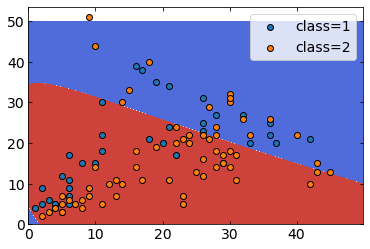

In [18]:
plot_deviced_area(model, train_X, train_Y)

In [9]:
# predict example
print(model.predict(np.array([[0.5, 0.5], [0.7, 0.7]])))

[2 2]


In [10]:
from imblearn.under_sampling import RandomUnderSampler

rs = RandomUnderSampler(random_state=1)
under_sampled_data, under_sampled_data_class = rs.fit_resample(data, data_class)

under_sampled_model = SVC(kernel="linear")

under_sampled_model.fit(under_sampled_data, under_sampled_data_class)

SVC(kernel='linear')

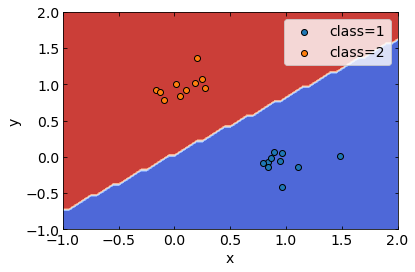

In [11]:
plot_deviced_area(under_sampled_model, under_sampled_data, under_sampled_data_class)

In [12]:
# over sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.5, random_state=42)
over_sampled_data, over_sampled_data_class = sm.fit_resample(data, data_class)

over_sampled_model = SVC(kernel="linear")
over_sampled_model.fit(over_sampled_data, over_sampled_data_class)

SVC(kernel='linear')

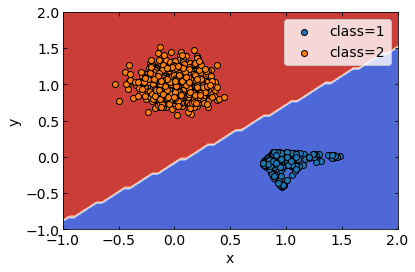

In [13]:
plot_deviced_area(over_sampled_model, over_sampled_data, over_sampled_data_class)